In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score , r2_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from scipy import stats

In [2]:
#Load the data
data = pd.read_csv('sdg_index_2000-2022.csv')

In [3]:
# Display the first few rows of the data
data.head()

,country_code,country,year,sdg_index_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,goal_7_score,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
0,AFG,Afghanistan,2000,36.0,28.8,27.3,19.2,1.6,20.8,32.4,21.0,38.5,5.2,0.0,25.8,94.7,99.4,0.0,51.9,39.2,34.2
1,AFG,Afghanistan,2001,36.3,28.8,30.6,19.4,1.6,20.8,32.4,22.3,38.5,5.2,0.0,25.8,94.5,99.4,0.0,51.9,39.2,34.2
2,AFG,Afghanistan,2002,36.3,28.8,30.7,19.7,1.6,20.8,32.7,21.5,38.4,5.2,0.0,26.1,94.1,99.4,0.0,51.8,39.2,34.2
3,AFG,Afghanistan,2003,36.7,28.8,32.5,19.9,1.6,20.8,33.0,24.5,38.4,5.2,0.0,26.5,94.4,99.4,0.0,51.8,39.2,34.2
4,AFG,Afghanistan,2004,37.1,28.8,32.1,21.1,1.6,20.8,33.3,28.0,38.5,5.2,0.0,26.8,94.8,99.4,0.0,51.8,39.2,34.2


In [4]:
# Check for missing values
print(data.isnull().sum())

country_code       0
country            0
year               0
sdg_index_score    0
goal_1_score       0
goal_2_score       0
goal_3_score       0
goal_4_score       0
goal_5_score       0
goal_6_score       0
goal_7_score       0
goal_8_score       0
goal_9_score       0
goal_10_score      0
goal_11_score      0
goal_12_score      0
goal_13_score      0
goal_14_score      0
goal_15_score      0
goal_16_score      0
goal_17_score      0
dtype: int64


In [5]:
# Assuming 'data' is your DataFrame
# Separate numeric and non-numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns



In [6]:
# Handling categorical data (example: country)
if 'country' in data.columns:
    label_encoder = LabelEncoder()
    data['country'] = label_encoder.fit_transform(data['country'])
    
data

,country_code,country,year,sdg_index_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,goal_7_score,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
0,AFG,0,2000,36.0,28.8,27.3,19.2,1.6,20.8,32.4,21.0,38.5,5.2,0.0,25.8,94.7,99.4,0.0,51.9,39.2,34.2
1,AFG,0,2001,36.3,28.8,30.6,19.4,1.6,20.8,32.4,22.3,38.5,5.2,0.0,25.8,94.5,99.4,0.0,51.9,39.2,34.2
2,AFG,0,2002,36.3,28.8,30.7,19.7,1.6,20.8,32.7,21.5,38.4,5.2,0.0,26.1,94.1,99.4,0.0,51.8,39.2,34.2
3,AFG,0,2003,36.7,28.8,32.5,19.9,1.6,20.8,33.0,24.5,38.4,5.2,0.0,26.5,94.4,99.4,0.0,51.8,39.2,34.2
4,AFG,0,2004,37.1,28.8,32.1,21.1,1.6,20.8,33.3,28.0,38.5,5.2,0.0,26.8,94.8,99.4,0.0,51.8,39.2,34.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,ZWE,179,2018,55.9,26.4,46.6,39.8,57.9,76.7,51.6,40.6,63.8,23.5,32.4,79.2,94.6,94.1,0.0,76.4,45.5,45.6
4136,ZWE,179,2019,53.7,21.4,46.0,40.6,60.6,77.0,51.3,39.9,62.8,23.8,24.0,58.6,94.6,94.2,0.0,76.4,44.0,44.5
4137,ZWE,179,2020,54.3,20.1,47.2,41.5,62.0,77.0,51.1,41.6,62.9,25.4,24.0,60.0,94.6,94.3,0.0,76.4,44.6,46.0
4138,ZWE,179,2021,54.8,20.8,48.4,41.9,62.5,77.1,51.1,41.6,63.1,27.0,24.0,61.2,94.5,94.3,0.0,77.9,43.1,48.1


In [7]:

data = data.drop(['country_code', 'year'], axis=1)

print(data)


      country  sdg_index_score  goal_1_score  goal_2_score  ...  goal_14_score  goal_15_score  goal_16_score  goal_17_score
0           0             36.0          28.8          27.3  ...            0.0           51.9           39.2           34.2
1           0             36.3          28.8          30.6  ...            0.0           51.9           39.2           34.2
2           0             36.3          28.8          30.7  ...            0.0           51.8           39.2           34.2
3           0             36.7          28.8          32.5  ...            0.0           51.8           39.2           34.2
4           0             37.1          28.8          32.1  ...            0.0           51.8           39.2           34.2
...       ...              ...           ...           ...  ...            ...            ...            ...            ...
4135      179             55.9          26.4          46.6  ...            0.0           76.4           45.5           45.6
4136    

In [8]:
# Detect and handle outliers using Z-score
z_scores = np.abs(stats.zscore(data.iloc[:, 1:]))
data = data[(z_scores < 3).all(axis=1)]
data

,country,sdg_index_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,goal_7_score,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
17,0,45.6,29.6,43.5,35.1,38.9,27.1,46.6,38.3,39.9,8.8,0.0,33.6,96.6,99.1,0.0,60.9,45.5,40.1
18,0,46.3,29.1,47.8,36.9,40.2,29.0,47.9,35.4,40.8,9.5,0.0,32.8,96.7,99.0,0.0,60.9,45.6,42.1
19,0,46.4,29.4,47.0,36.5,42.0,30.8,49.2,35.6,40.6,9.7,0.0,29.8,96.7,99.0,0.0,60.9,46.1,42.0
20,0,47.3,27.9,46.0,37.6,42.0,30.2,50.4,35.9,41.1,9.8,0.0,30.2,96.7,99.0,0.0,73.2,45.3,44.1
23,1,65.9,96.4,47.0,73.6,81.7,36.7,68.8,75.0,61.2,17.6,84.4,74.8,84.3,90.0,35.2,66.7,66.1,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,179,55.9,26.4,46.6,39.8,57.9,76.7,51.6,40.6,63.8,23.5,32.4,79.2,94.6,94.1,0.0,76.4,45.5,45.6
4136,179,53.7,21.4,46.0,40.6,60.6,77.0,51.3,39.9,62.8,23.8,24.0,58.6,94.6,94.2,0.0,76.4,44.0,44.5
4137,179,54.3,20.1,47.2,41.5,62.0,77.0,51.1,41.6,62.9,25.4,24.0,60.0,94.6,94.3,0.0,76.4,44.6,46.0
4138,179,54.8,20.8,48.4,41.9,62.5,77.1,51.1,41.6,63.1,27.0,24.0,61.2,94.5,94.3,0.0,77.9,43.1,48.1


In [9]:
X = data.iloc[:,2:]
Y = data.iloc[:,1]
print(X)

      goal_1_score  goal_2_score  goal_3_score  ...  goal_15_score  goal_16_score  goal_17_score
17            29.6          43.5          35.1  ...           60.9           45.5           40.1
18            29.1          47.8          36.9  ...           60.9           45.6           42.1
19            29.4          47.0          36.5  ...           60.9           46.1           42.0
20            27.9          46.0          37.6  ...           73.2           45.3           44.1
23            96.4          47.0          73.6  ...           66.7           66.1           60.0
...            ...           ...           ...  ...            ...            ...            ...
4135          26.4          46.6          39.8  ...           76.4           45.5           45.6
4136          21.4          46.0          40.6  ...           76.4           44.0           44.5
4137          20.1          47.2          41.5  ...           76.4           44.6           46.0
4138          20.8          48

In [10]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform the numeric data
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(3921, 17)

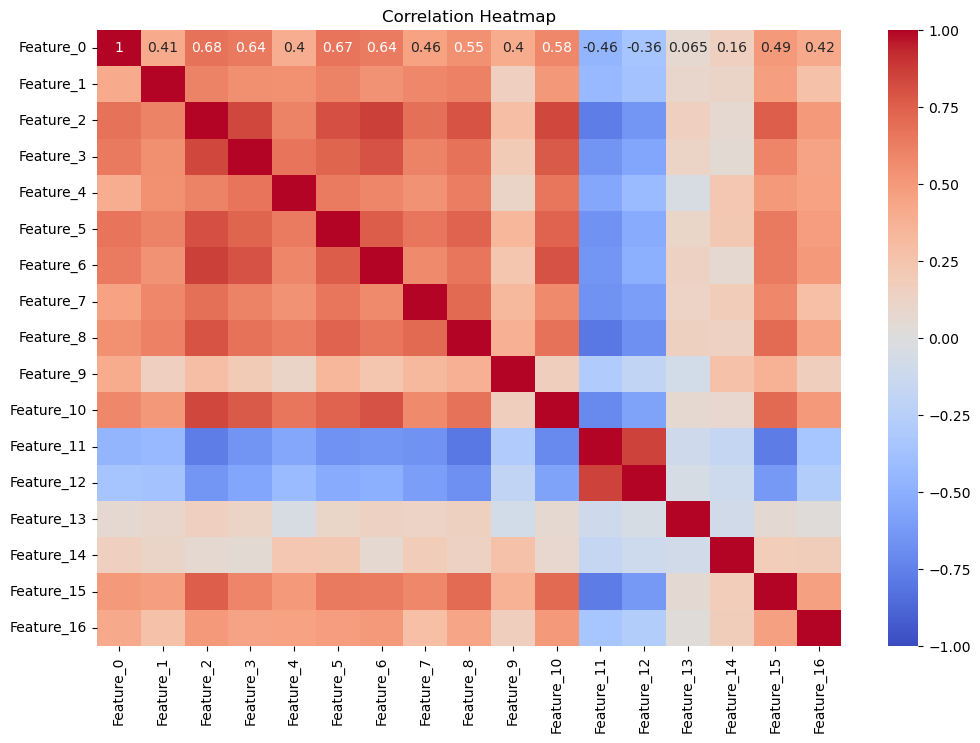

In [11]:
scaled_df = pd.DataFrame(X_scaled, columns=[f'Feature_{i}' for i in range(X_scaled.shape[1])])

corr_matrix = scaled_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

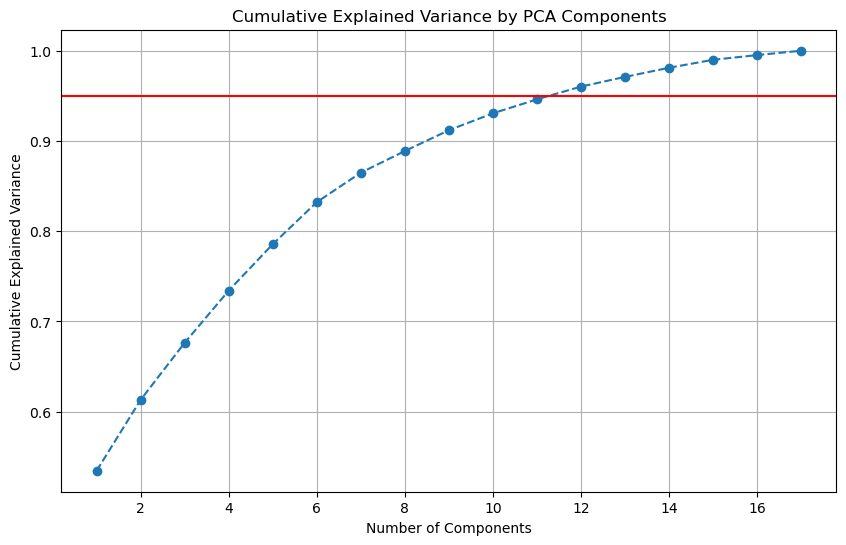

Ideal number of components to retain 95% variance: 12


In [12]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.axhline(y=0.95, color='r', linestyle='-')  # 95% threshold line
plt.grid(True)
plt.show()

# Find the number of components needed to retain 95% of the variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Ideal number of components to retain 95% variance: {n_components_95}")


In [13]:
pca = PCA(n_components = 12)
X = pca.fit_transform(X_scaled)
X.shape

(3921, 12)

In [14]:

pca_df = pd.DataFrame(data=X, columns=['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10','PC11', 'PC12'])


print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5  ...       PC8       PC9      PC10      PC11      PC12
0 -5.442289  0.014756  0.483228 -1.312791 -0.948058  ... -0.988088  0.265620 -1.139408 -0.460438  0.833652
1 -5.248020  0.013354  0.564386 -1.344796 -0.729638  ... -1.126866  0.194411 -1.217719 -0.495584  0.776024
2 -5.239533  0.037985  0.579256 -1.346289 -0.716482  ... -1.024954  0.152527 -1.274022 -0.485118  0.805582
3 -5.137956  0.608832  0.636890 -1.310054 -0.217897  ... -1.121324  0.127632 -1.135723 -0.633534  0.843482
4 -0.060207  0.804360  0.829032  1.044324 -1.750760  ... -0.306214  0.445265  0.306044 -0.514357  0.114198

[5 rows x 12 columns]


C:\Users\dhair\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


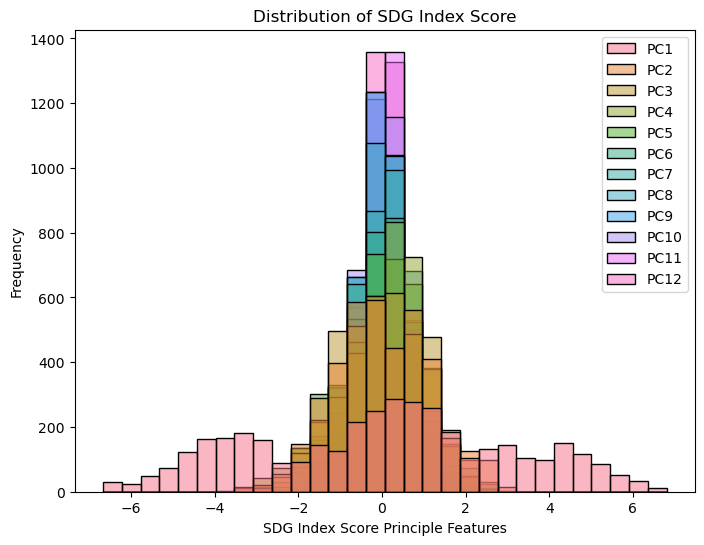

In [15]:
plt.figure(figsize = (8,6))
sns.histplot(pca_df , bins = 30 )
plt.title('Distribution of SDG Index Score')
plt.xlabel('SDG Index Score Principle Features')
plt.ylabel('Frequency')
plt.show()

In [16]:
Y.shape

(3921,)

In [17]:

x_train, x_test , y_train , y_test = train_test_split(pca_df, Y , test_size=0.3, random_state=42)
x_test

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
803,1.676015,-0.789512,0.988121,-0.162763,0.154868,0.211934,-1.050550,-0.068799,0.702618,0.746097,0.899650,-0.093844
1204,5.458512,0.826016,-0.946508,0.780065,0.758113,0.789220,0.139626,0.652475,0.319706,-0.043751,0.309942,0.328243
3733,1.829340,-1.310596,0.834490,-0.027619,0.633822,-1.235575,0.439341,-0.074407,-0.396343,-0.506753,0.250125,-0.070877
3483,-2.106936,-0.448767,-0.151390,0.052240,1.411791,-0.794176,0.996050,1.069196,0.042228,0.050136,0.312617,-0.305777
1739,0.918846,-1.202479,1.274061,0.088379,0.079757,0.152301,-0.274477,0.377030,-0.390876,0.388350,0.622939,-0.219600
...,...,...,...,...,...,...,...,...,...,...,...,...
111,0.630553,1.168509,1.245137,-0.163578,-1.564483,-0.509891,0.224301,-0.470885,0.774884,0.313854,0.221839,-0.352138
2304,-5.553643,0.392245,-1.210358,0.918296,-1.836957,1.001109,-0.053522,-0.234379,-0.355972,-0.948888,0.905335,0.253219
1089,-0.559076,-1.197465,1.299563,-0.356719,-1.088794,-0.353966,-0.441735,-0.279062,-0.223351,0.417719,0.139700,0.260981
2691,-3.508972,1.062130,-1.345435,1.081852,1.286518,-1.261372,0.271537,0.036606,-0.555773,-0.620089,-0.266653,0.529108


In [18]:
model1 = LinearRegression()
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)
accuracy = r2_score(y_test, y_pred)
accuracy

0.9845102305038752

In [19]:
best_k = 1
best_accuracy = 0

# Loop over k values from 1 to 20
for k in range(10, 21):
    # Initialize KNN classifier with current k value
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    
    y_pred = knn.predict(x_test)
    
    accuracy = r2_score(y_test, y_pred)
    
    
    # Update best_k and best_accuracy if the current accuracy is greater
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"\nBest k: {best_k} with accuracy: {best_accuracy*100:.4f}%")


Best k: 10 with accuracy: 98.5628%


In [29]:
svr = SVR(kernel='linear')
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)
accuracy = r2_score(y_test,y_pred)
accuracy

0.9813295789946178

In [27]:
rfr = RandomForestRegressor(random_state=42)
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)
accuracy = r2_score(y_test,y_pred)
accuracy

0.9959519219802772

In [20]:
# Sustainability Score Calculation using Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
accuracy = r2_score(y_test,y_pred)
accuracy

0.9933641851533511

In [21]:
def print_metrics(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse}")
    print(f"{model_name} - Mean Absolute Error: {mae}")
    print(f"{model_name} - R^2 Score: {r2}")

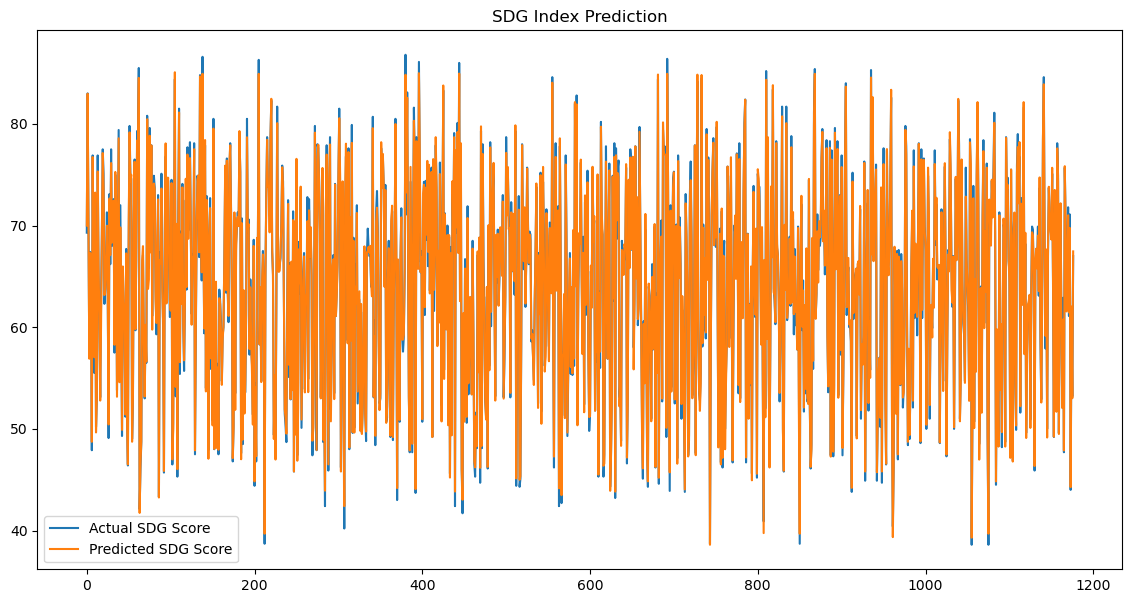

In [22]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual SDG Score')
plt.plot(y_pred, label='Predicted SDG Score')
plt.legend()
plt.title("SDG Index Prediction")
plt.show()

In [23]:
import pickle

In [24]:
with open("scaled.pkl", 'wb') as file:
    pickle.dump(scaler, file)

In [25]:
with open("pca.pkl", 'wb') as file:
    pickle.dump(pca, file)

In [26]:
import pickle
filename ="gradient_boosting_model.pkl"
with open(filename, 'wb') as file:
    pickle.dump(gbr, file)